In [80]:
import tensorflow as tf
from tensorflow import keras

In [81]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

In [82]:
import matplotlib.pyplot as plt

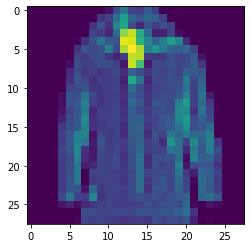

In [83]:
plt.imshow(X_train_full[19])

In [84]:
Y_train_full.shape

(60000,)

In [85]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [86]:
class_names[Y_train_full[19]]

'Coat'

In [87]:
X_train_full[19]

array([[  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,  12,  55,  98,
         52,  45,  70,  47,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  39,  52,  93, 144,
         83,  66,  86,  78,  48,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35,  67,  36, 118, 151,
         60,  28,  63,  44,  60,  52,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51,  43,  29,  90, 211,
        232, 157,  90,  22,  21,  53,   9,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,  36,  63,  99,  70,  63, 246,
        241, 164, 116,  80, 110, 145, 117,  28,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  36,  66,  56,  63, 109,  55, 223,
        255, 225, 110, 134, 105,  79,  76,  87,  49,   0,   0,   0,   0,
          0,   0],
       [  

## Data Normalization
### Divide by 255(As we know that pixel intensities lie between 0 and 255)

In [88]:
X_train_nor = X_train_full/255.0
X_test_nor = X_test / 255.0

## Splitting into Train/Validation/Test DAtasets

In [89]:
X_valid, X_train = X_train_nor[:5000], X_train_nor[5000:]
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]

In [90]:
print(
    X_valid.shape,
    Y_valid.shape,
    X_train.shape,
    Y_train.shape
)

(5000, 28, 28) (5000,) (55000, 28, 28) (55000,)


## Creating Model For Classification

In [91]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [94]:
import pydot

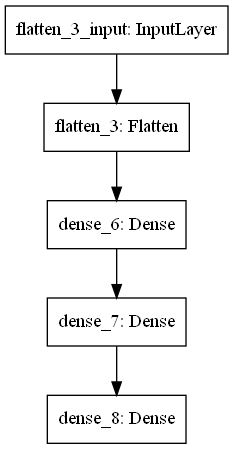

In [95]:
keras.utils.plot_model(model)

In [96]:
weights, biases = model.layers[1].get_weights()

In [97]:
weights.shape

(784, 300)

In [98]:
biases.shape

(300,)

In [99]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [100]:
model_history = model.fit(X_train, Y_train, epochs=30,
validation_data=(X_valid, Y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5332 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3917 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3942 - accuracy: 0.8617 - val_loss: 0.3752 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3754 - accuracy: 0.8676 - val_loss: 0.3715 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3635 - accuracy: 0.8713 - val_loss: 0.3620 - val_accuracy:

In [101]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [102]:
model_history.history['loss']

[0.7236780524253845,
 0.48432329297065735,
 0.43926575779914856,
 0.41254061460494995,
 0.39415401220321655,
 0.37537190318107605,
 0.3634667992591858,
 0.3519733250141144,
 0.34173864126205444,
 0.3324226140975952,
 0.32434672117233276,
 0.315105140209198,
 0.3082481324672699,
 0.30250445008277893,
 0.29487884044647217,
 0.28935888409614563,
 0.2840943932533264,
 0.2781604528427124,
 0.2729814350605011,
 0.2674770653247833,
 0.26250433921813965,
 0.2576865255832672,
 0.253560870885849,
 0.24866965413093567,
 0.24443283677101135,
 0.24068966507911682,
 0.23636707663536072,
 0.23279036581516266,
 0.22856011986732483,
 0.225218266248703]

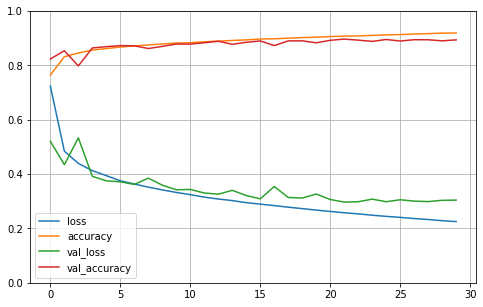

In [103]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [104]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 79.5918 - accuracy: 0.8289


[79.5918197631836, 0.8288999795913696]

In [105]:
X_new = X_test[:3]

In [106]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [107]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [108]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


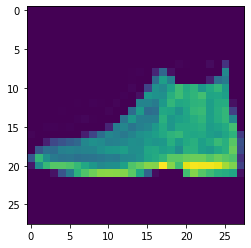

In [109]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


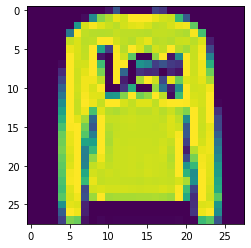

In [110]:
print(plt.imshow(X_test[1]))